In [1]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import math
import textwrap


# **Q1 a)**

We will model a coin that gives heads with probability $0.2$ as a Bernoulli $(0.2)$ RV.

(a) Toss the coin $20$ times. Plot the outcomes against the trial number. You must label the plot appropriately. Explain what you observe in the plot.

We want to perform an experiment that has a certain number of independent trials (repeats) of tossing a coin.

We don't toss a real coin, just use a function that comes close to simulating a coin

    aBernoulliExperiment(randomNumGen, bernoulliParam_p=0.5, numRepeatsOfExp = 1, numTrialsInAnExp = 1, profitLoss=[1,0])

The first argument is a random number Generator that enables simulations requiring generation of random outcomes. The rest of the arguments should be self-explanatory. We have the Bernoulli parameter (the probability p of heads/ the event of interest), the number of repeats of an experiment, and the number of trials (number of coin tosses) in an experiment.

Heads is mapped to profitLoss[0] and Tails is mapped to profitLoss[1]. By default the mapping is as that for a Bernoulli RV.

In [2]:
def aBernoulliExperiment(randomNumGen, bernoulliParam_p=0.5, numRepeatsOfExp = 1, numTrialsInAnExp = 1, profitLoss=[1,0]):

    repeatIndex = 0
    observation = np.ones((numRepeatsOfExp, numTrialsInAnExp))

    observation = randomNumGen.random((numRepeatsOfExp, numTrialsInAnExp))

    index_ge1 = np.less_equal(observation, bernoulliParam_p)

    observation[index_ge1] = profitLoss[0]
    observation[np.invert(index_ge1)] = profitLoss[1]



    return observation

Frequentist performs an experiment that has numTrialsInAnExp=1 independent trials (repeats) of tossing a coin.

Frequentist may repeat the above experiment numRepeatsOfExp times.

The outcome of the first experiment is observation[0][0]

The outcome of the second experiment is observation[1][0]

The outcome of the third experiment is observation[2][0]

... and so on

Note that each experiment's outcome is governed by the same Bernoulli(p) RV. As we increase the number of experiments, the histogram of the outcomes of the experiments begins to look more and more like the PMF of the Bernoulli(p) RV.

PS: We will use numTrialsInAnExp > 1 when we simulate a Binomial RV.


In [3]:
v_numTrialsInAnExp = 20
v_numRepeatsOfExp = 1
v_bernoulliParam_p = 0.2
observation = aBernoulliExperiment(np.random.default_rng(1236), bernoulliParam_p=v_bernoulliParam_p, numRepeatsOfExp = v_numRepeatsOfExp, numTrialsInAnExp = v_numTrialsInAnExp, profitLoss=[1,0])

print(observation)


[[0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


The histogram values are: [17  3]
The histogram values are: [0.  0.5 1. ]


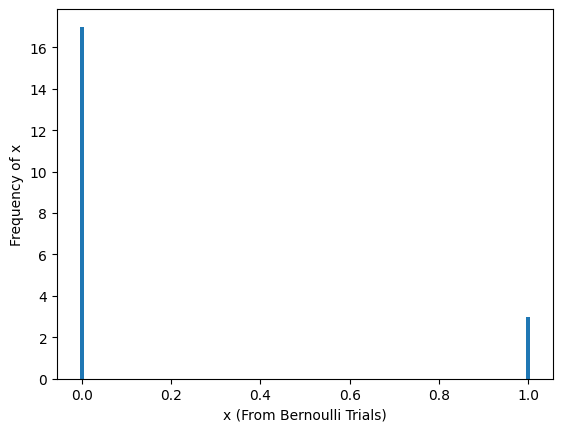

In [4]:
fig1, (ax1) = plt.subplots(nrows=1, ncols=1, sharex=True)

histVal = np.histogram(observation, bins=[0,0.5,1],density=False)

print("The histogram values are:", histVal[0])
print("The histogram values are:", histVal[1])

ax1.bar([0, 1], histVal[0]/v_numRepeatsOfExp, width = 0.01)

ax1.set_xlabel("x (From Bernoulli Trials)")
ax1.set_ylabel("Frequency of x")
fig1.set_label("No of Trials of Bern Exp is " + str(v_numTrialsInAnExp))

Observation:
We have observed that Heads (1) was obtained 3 times while Tails (0) was obtained 17 times. We were told that the probability of obtaining 0 was
0.8, which is four times the probability of obtaining 1 (0.2). Hence, this observation is valid.

Now, the observed probability, or the classical probability, of obtaining 1 is 3/20=0.15. The given probability was 0.2. The error obtained is 0.2-0.15=0.05.


# **1 b)**

 Now repeat the above 5 times. Plot the outcomes for each repeat against the trial number, all on the same figure. You must label the plot appropriately. Explain what you observe in the plot.

We have four frequentists performing repeat experiments with a coin. Each chooses to repeat the experiment a different number of times. We observe the differences in the histograms (over outcomes) obtained by the frequentists.

In [5]:
v_numTrialsInAnExp = 20
v_numRepeatsOfExp = 5
v_bernoulliParam_p = 0.2
observation = aBernoulliExperiment(np.random.default_rng(1236), bernoulliParam_p=v_bernoulliParam_p, numRepeatsOfExp = v_numRepeatsOfExp, numTrialsInAnExp = v_numTrialsInAnExp, profitLoss=[1,0])

print(observation)

[[0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


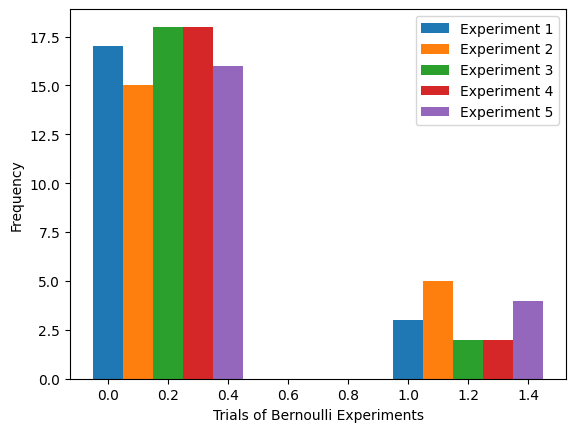

In [6]:
fig1, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True)

for i in range(5):
    histVal = np.histogram(observation[i], bins=[0,0.5,1], density=False)
    x_positions = np.array([0, 1])+0.1*i
    ax1.bar(x_positions, histVal[0], width=0.1, label=f'Experiment {i+1}')

ax1.set_xlabel("Trials of Bernoulli Experiments")
ax1.set_ylabel("Frequency")
ax1.legend()
plt.show()

Observation: The given probability of obtaining 0 was 0.8, while that of obtaining 1 was 0.2. The probability of obtaining 0 was 4 times that of obtaining 1. Hence, this observation is valid.

Observations from our five trials:
Trial 1: The classical probability of obtaining 1 was 3/20=0.15. The error is hence 0.2-0.15=0.05.
Trial 2: The classical probability of obtaining 1 was 5/20=0.25. The error is hence 0.25-0.2=0.05.
Trial 3: The classical probability of obtaining 1 was 2/20=0.1. The error is hence 0.2-0.1=0.1.
Trial 4: The classical probability of obtaining 1 was 2/20=0.1. The error is hence 0.2-0.1=0.1.
Trial 5: The classical probability of obtaining 1 was 4/20=0.2. The error is hence 0.2-0.2=0.0.

In each case, we have foudn that the probability of obtaining 1 is significantly less than that of obtaining 0, which goes with what the PMF of the function told us the probabilities were.


# **1 c)**

Repeat (a) $100$ times. You will end up with $100$ sequences each of length $20$. Store them in an appropriate array. For each sequence, calculate the total number of $1$ (s) and plot their histogram (with frequency of occurance on the y-axis). Which PMF does the histogram approximate?

In [7]:
v_numTrialsInAnExp = 20
v_numRepeatsOfExp = 100
v_bernoulliParam_p = 0.2
observation = aBernoulliExperiment(np.random.default_rng(1236), bernoulliParam_p=v_bernoulliParam_p, numRepeatsOfExp = v_numRepeatsOfExp, numTrialsInAnExp = v_numTrialsInAnExp, profitLoss=[1,0])

print(observation)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


Total ones:  414.0
Probability of one: 0.207


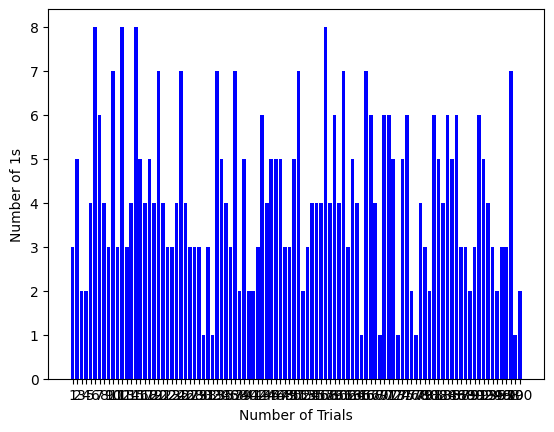

In [8]:
observation=np.array(observation)
observations = np.random.randint(2, size=(100, 20))

fig1, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True)

num_ones = [sum(obs) for obs in observation]
total_ones_sum=sum(num_ones)
print("Total ones: ",total_ones_sum)
print("Probability of one:", total_ones_sum/2000)

ax1.bar(np.arange(len(observations)), num_ones, width=0.8, color='blue')

ax1.set_xlabel("Number of Trials")
ax1.set_ylabel("Number of 1s")
plt.xticks(np.arange(len(observations)), np.arange(1, len(observations) + 1))
plt.show()


Observation: This graph represents the number of 1s obtained in 100 experiments (20 trials each).

The total number of ones obtained is 414.0
The probability of one is 0.207

The total number of ones obtained in 2000 trials is 414, although it was random in each experiment. This is approximately a Bernoulli PMF.


# **1 d)**

Starting with the array you obtained in (c), choose all those sequences that sum to at least $3$. For each such sequence, calculate the total number of $1$ (s) and plot their histogram (with frequency of occurance on the y-axis). Which PMF does the histogram approximate?

Total number of ones:  385.0
Probability of one:  0.2347560975609756


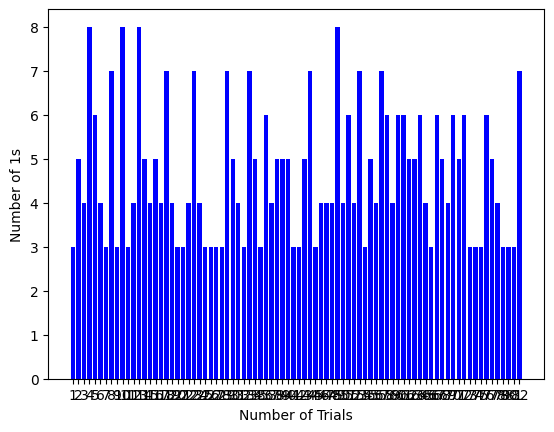

In [9]:
observations = np.array(observation)

sums = np.sum(observations, axis=1)

filtered_observations = observations[sums >= 3]
num_ones = filtered_observations.sum(axis=1)
x=len(filtered_observations)
new_fil=[]
for i in range(len(filtered_observations)):
  new_fil.append(filtered_observations[i].tolist())
count=0
for i in new_fil:
  for j in i:
    count+=j
print("Total number of ones: ", count)
print("Probability of one: ", count/(len(filtered_observations)*20))

fig1, ax1 = plt.subplots()
ax1.bar(np.arange(len(filtered_observations)), num_ones, width=0.8, color='blue')
ax1.set_xlabel("Number of Trials")
ax1.set_ylabel("Number of 1s")
plt.xticks(np.arange(len(filtered_observations)), np.arange(1, len(filtered_observations) + 1))
plt.show()


Observation: This graph represents the number of 1s obtained in 100 experiments (20 trials each).

The total number of ones obtained is 385.0
The probability of one is 0.234

The total number of ones obtained in 2000 trials is 385, although it was random in each experiment. This is approximately a Bernoulli PMF.
This is conditioned that we get at least 3 ones in 20 trials.


# **Q2)**
 Pick four values of $\alpha$ uniformly and randomly from the interval $(0, 100)$. For each $\alpha$, simulate a Binomial $(n,p)$, with $n$ chosen for the $\alpha$ to be as small as possible while providing a reasonable approximation (the PMFs/ histograms look visually similar) of the Poisson $(\alpha)$. Note that you must also simulate the Poisson RVs. Choose the number of experiements for all the RVs to be large enough to ensure that the resulting histograms are good approximations of the PMFs.

In [10]:
def aBinomialExperiment(randomNumGen, binomialParam_n=5, binomialParam_p=0.5, numberOfBinomialExperiments = 1, profitLoss_Bern = [1,0]):

    outcomesOfBernTrails = aBernoulliExperiment(randomNumGen, bernoulliParam_p=binomialParam_p, numRepeatsOfExp = numberOfBinomialExperiments, numTrialsInAnExp = binomialParam_n, profitLoss = profitLoss_Bern)

    outcomeOfBinomialExp = np.sum(outcomesOfBernTrails, axis = 1)

    return outcomeOfBinomialExp

Frequentist performs an experiment that has numTrialsInAnExp=1 independent trials (repeats) of tossing a coin.

Frequentist may repeat the above experiment numRepeatsOfExp times.

The outcome of the first experiment is observation[0][0]

The outcome of the second experiment is observation[1][0]

The outcome of the third experiment is observation[2][0]

... and so on

Note that each experiment's outcome is governed by the same Bernoulli(p) RV. As we increase the number of experiments, the histogram of the outcomes of the experiments begins to look more and more like the PMF of the Bernoulli(p) RV.

PS: We will use numTrialsInAnExp > 1 when we simulate a Binomial RV.

In [11]:
np.random.seed(65)
random_alpha = sorted(np.random.randint(0, 101, size=4))
print("Values of alpha: ",random_alpha)

Values of alpha:  [40, 46, 63, 85]


In [12]:
random_n=[]
p=0.2
for i in range(4):
  random_n.append(int(random_alpha[i]/p))
print("Values of n: ",random_n)

Values of n:  [200, 230, 315, 425]


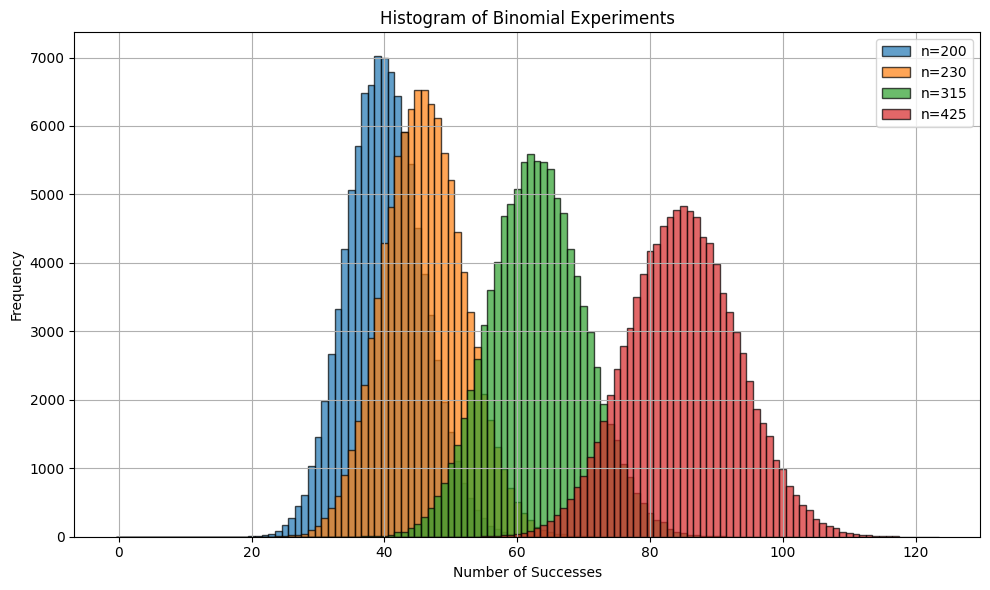

In [13]:

numberOfBinomialExps = 100000

def aBinomialExperiment(rng, n, p, num_experiments, profitLoss_Bern):
    return rng.binomial(n, p, size=num_experiments)

outcomes_binomial_all = []
for i in range(4):
    v_binomial_n = random_n[i]
    outcomeOfBinomialExp = aBinomialExperiment(np.random.default_rng(78918), v_binomial_n, p, numberOfBinomialExps, profitLoss_Bern=[1, 0])
    outcomes_binomial_all.append(outcomeOfBinomialExp)

plt.figure(figsize=(10, 6))
for i, outcomes in enumerate(outcomes_binomial_all):
    plt.hist(outcomes, bins=np.arange(0, max(outcomes) + 1.5) - 0.5, edgecolor='black', alpha=0.7, label=f'n={random_n[i]}')

plt.title("Histogram of Binomial Experiments")
plt.xlabel("Number of Successes")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:

numberOfPoissonExps = 100000

def aPoissonExperiment(rng, lam, num_experiments):
    return rng.poisson(lam, size=num_experiments)

outcomes_poisson_all = []
for lam in random_alpha:
    outcomeOfPoissonExp = aPoissonExperiment(np.random.default_rng(78918), lam, numberOfPoissonExps)
    outcomes_poisson_all.append(outcomeOfPoissonExp)

for i, outcomes in enumerate(outcomes_poisson_all):
    print(f'Poisson Observations for lambda={random_alpha[i]}: {outcomes}')


Poisson Observations for lambda=40: [36 34 37 ... 36 39 46]
Poisson Observations for lambda=46: [42 39 42 ... 44 46 48]
Poisson Observations for lambda=63: [58 55 59 ... 48 63 50]
Poisson Observations for lambda=85: [79 76 80 ... 79 82 84]


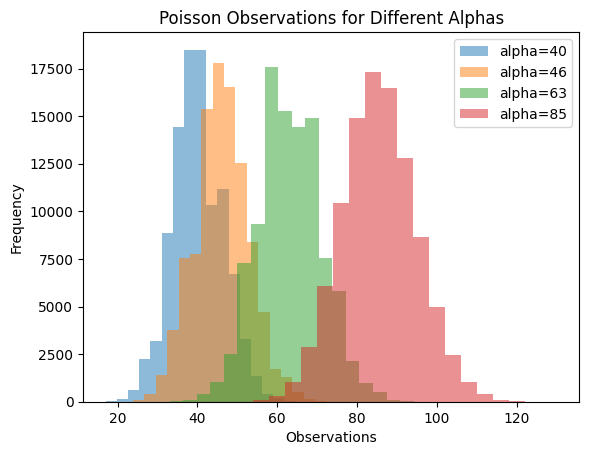

In [15]:
for i, outcomes in enumerate(outcomes_poisson_all):
    plt.hist(outcomes, bins=20, alpha=0.5, label=f'alpha={random_alpha[i]}')

plt.xlabel('Observations')
plt.ylabel('Frequency')
plt.title('Poisson Observations for Different Alphas')
plt.legend()
plt.show()


Observation : with the increasing value of alpha (poisson distribution) and n(binomial distribution), the curve changes its shape to be that of the bell.

Both the graph of Poisson Distribution and Binomial Distribution with different values of lambda and n looks very similar.

We can get a Poisson Distribution by a Binomial distribution.

# **Q3)**
Illustrate the law of large numbers and the central limit theorem for a sum of iid Poisson RVs. Note that the provided code (Binomial.ipynb) does the same for a sum of Bernoulli $(p)$ RVs.

Do the above for two values of $\alpha$ chosen uniformly and randomly from $(1, 20)$. For each value of $\alpha$ demonstrate the above over an increasing, four long, sequence of number of RVs being added. For example, in the provided code, we simulated $5,10,100,1000$ Bernoulli RVs being summed. Note that you may need a sequence different from the example. Figure out a sequence that shows convergence to a bell shaped curve (central limit theorem) and clustering of the histogram around the mean (law of large numbers).

In [16]:
np.random.seed(12)
alpha = sorted(np.random.randint(1, 21, size=2))
print("Random Values of alpha are = ",alpha)

Random Values of alpha are =  [7, 12]


Observation:

In [17]:
np.random.seed(12)
alpha = sorted(np.random.randint(1, 21, size=2))
print("Random Values of alpha are = ",alpha)

Random Values of alpha are =  [7, 12]


Random Values of alpha are = [7, 12]


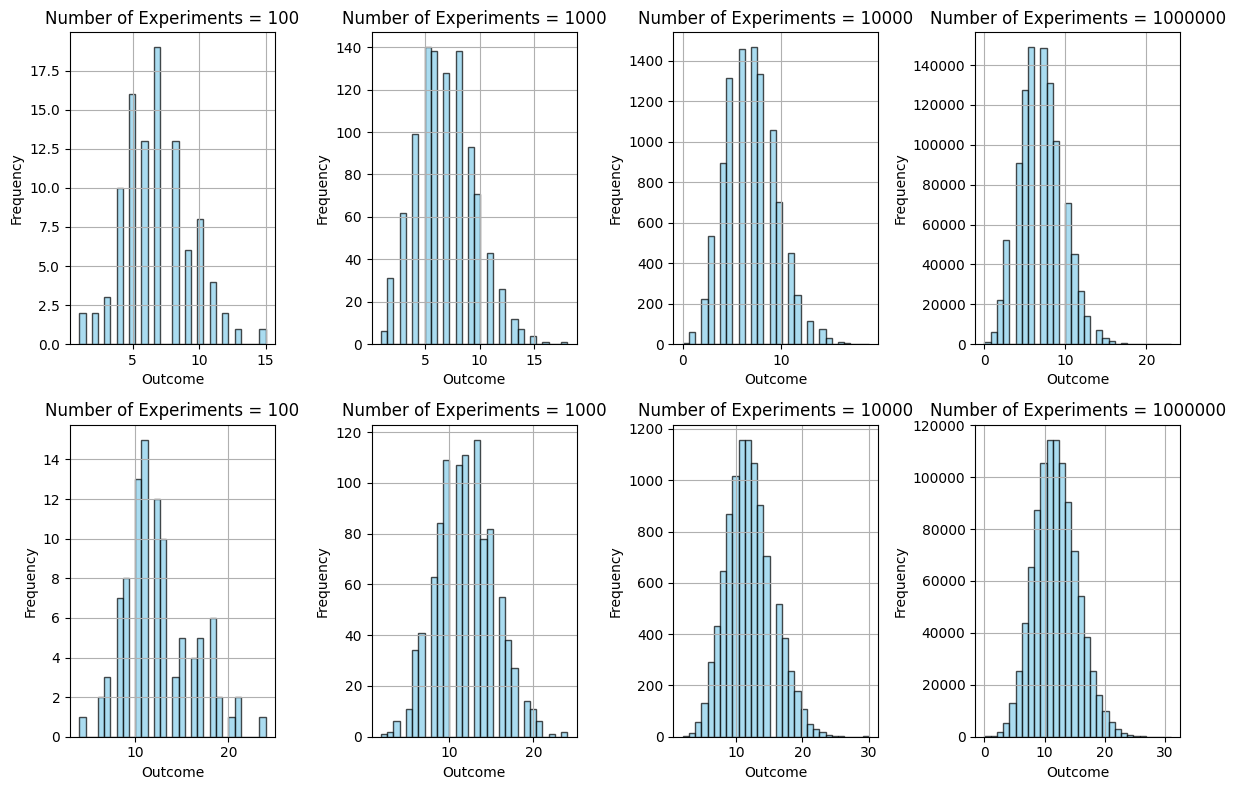

In [18]:

np.random.seed(12)

alphas = sorted(np.random.randint(1, 21, size=2))
print("Random Values of alpha are =", alphas)

numberOfPoissonExps = [100, 1000, 10000, 1000000]

def aPoissonExperiment(rng, lam, num_experiments):
    return rng.poisson(lam, size=num_experiments)

plt.figure(figsize=(12, 8))


for alpha in alphas:
    outcomes_poisson_all = []

    for val in numberOfPoissonExps:
        outcomeOfPoissonExp = aPoissonExperiment(np.random.default_rng(78918), alpha, val)
        outcomes_poisson_all.append(outcomeOfPoissonExp)

    for i, val in enumerate(numberOfPoissonExps):
        plt.subplot(2, 4, alphas.index(alpha) * len(numberOfPoissonExps) + i + 1)
        plt.hist(outcomes_poisson_all[i], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
        plt.title(f'Number of Experiments = {val}')
        plt.xlabel('Outcome')
        plt.ylabel('Frequency')
        plt.grid(True)

plt.tight_layout()
plt.show()


Observation : In the given plots, 1st row has histograms for alpha = 7 and for the second row, alpha = 12.

With the increased number of experiments, we observe that the curve takes the shape of a bell (Gaussian). This proves the Central Limit Theorem.

The curves cluster around a particular value (lambda) in each case- 7 in the first row and 12 in the second row . This proves the law of large numbers.

hence, both the laws can be observed from the given graphs.